### 参考文章https://mp.weixin.qq.com/s/ARF04wfo1dAAhpCJnYDpRw

### 数据集 https://www.datafountain.cn/dataSets/35/details#

####     customerID ：用户ID。

    gender：性别。（Female & Male）

    SeniorCitizen ：老年人 （1表示是，0表示不是）

    Partner ：是否有配偶 （Yes or No）

    Dependents ：是否经济独立 （Yes or No）

    tenure ：客户的职位（0-72，共73个职位）

    PhoneService ：是否开通电话服务业务 （Yes or No）

    MultipleLines：是否开通了多线业务（Yes 、No or No phoneservice 三种）

    InternetService：是否开通互联网服务 （No, DSL数字网络，fiber optic光纤网络 三种）

    OnlineSecurity：是否开通网络安全服务（Yes，No，No internetserive 三种）

    OnlineBackup：是否开通在线备份业务（Yes，No，No internetserive 三种）

    DeviceProtection：是否开通了设备保护业务（Yes，No，No internetserive 三种）

    TechSupport：是否开通了技术支持服务（Yes，No，No internetserive 三种）

    StreamingTV：是否开通网络电视（Yes，No，No internetserive 三种）

    StreamingMovies：是否开通网络电影（Yes，No，No internetserive 三种）

    Contract：签订合同方式 （按月，一年，两年）

    PaperlessBilling：是否开通电子账单（Yes or No）

    PaymentMethod：付款方式（bank transfer，credit card，electronic check，mailed check）

    MonthlyCharges：月费用

    TotalCharges：总费用

    Churn：该用户是否流失（Yes or No）

## 1.1、导入库和数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.cm as cm
import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder   # 编码转换
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier     # 随机森林
from sklearn.svm import SVC,LinearSVC                   # 支持向量机
from sklearn.linear_model import LogisticRegression     # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.naive_bayes import GaussianNB              # 朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier         # 决策树
from lightgbm import LGBMClassifier                     
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
telcom=pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 1.2、查看数据集信息

In [4]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telcom.shape

(7043, 21)

In [6]:
telcom.describe()   # 只对数据列进行描述，字段列省略

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 数据清洗
## 2.1 查找缺失值

In [7]:
pd.isnull(telcom).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
telcom['Churn'].value_counts()  # 查看有多少客户流失

No     5174
Yes    1869
Name: Churn, dtype: int64

## 2.2、查看数据类型

In [9]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## 2.3、转换类型
#### TotalCharges表示总费用，这里为对象类型，需要转换为float类型，包括字符串
#### convert_numeric=True表示强制转换数字，不可变的值变成Nan

In [10]:
telcom['TotalCharges']=telcom['TotalCharges'].convert_objects(convert_numeric=True)
#telcom['TotalCharges']=pd.to_numeric(telcom['TotalCharges'], errors='coerce') # 这种方法也可
telcom['TotalCharges'].dtypes

dtype('float64')

#### 再次查找缺失值

In [11]:
pd.isnull(telcom['TotalCharges']).sum()

11

## 2.4、处理缺失值
#### 将缺失的11个值直接删掉行

In [12]:
telcom.dropna(inplace=True)
telcom.shape

(7032, 21)

## 2.5、数据归一化处理
#### 对Churn列中的值yes和no分别用1和0代替，方便后续处理

In [13]:
telcom['Churn'].replace(to_replace='Yes',value=1,inplace=True)
telcom['Churn'].replace(to_replace='No',value=0,inplace=True)
telcom['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# 数据可视化
## 3.1 查看流失客户比

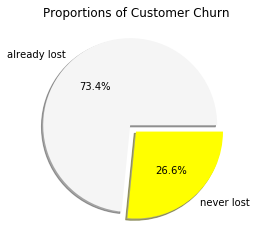

In [14]:
churnvalue=telcom["Churn"].value_counts()
#labels=telcom["Churn"].value_counts().index
labels=['already lost','never lost']

#rcParams["figure.figsize"]=6,6
# explode是每一块距离中心的距离
# autopct控制饼图内百分比设置,可以使用format字符串或者format function '%1.1f'指小数点前后位数(没有用空格补齐)
plt.pie(churnvalue,labels=labels,colors=["whitesmoke","yellow"], explode=(0.1,0),autopct='%1.1f%%', shadow=True)
plt.title("Proportions of Customer Churn")
plt.savefig('E://1.png')
plt.show()

## 3.2、性别、老年人、配偶、亲属对流客户流失率的影响
#### sns,countplot()以柱状图的形式展示每个类别的数量

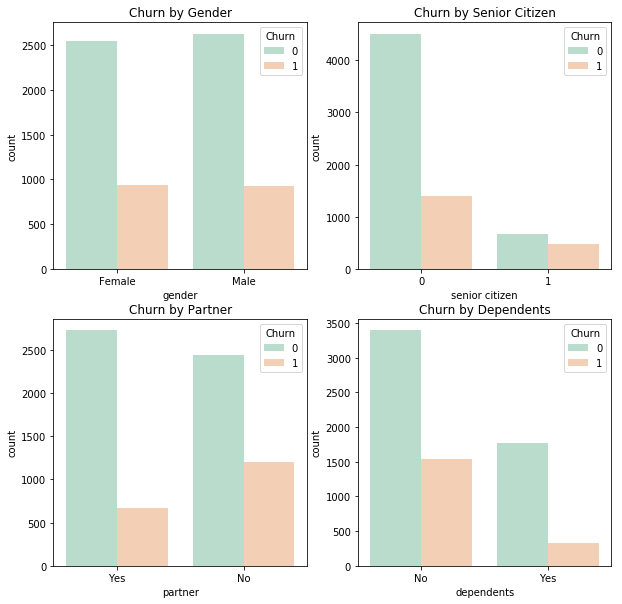

In [15]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(x="gender",hue="Churn",data=telcom,palette="Pastel2") # palette参数表示设置颜色，这里设置为主题色Pastel2
plt.xlabel("gender")
plt.title("Churn by Gender")

plt.subplot(2,2,2)
sns.countplot(x="SeniorCitizen",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("senior citizen")
plt.title("Churn by Senior Citizen")

plt.subplot(2,2,3)
sns.countplot(x="Partner",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("partner")
plt.title("Churn by Partner")

plt.subplot(2,2,4)
sns.countplot(x="Dependents",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("dependents")
plt.title("Churn by Dependents")
plt.show()


## 3.3、提取特征
#### 当一个feature有10几种甚至几百种取值可能的时候，使用get_dummies是一件很恐怖的事情。因为：例如feature1取值有[“a”,“b”,…“z”]26中可能的话，那么显然用哑变量就会把这一个feature变为26列。显然增加了数据的稀疏性，并且没有意义（视情况而定）。这时候或许就可以用pd.factorize()了。他会把他们分解为0-25种数字。同时1列字符串经过变换后仍是一列。就不会使得数据集看上去很臃肿了。


In [16]:
charges=telcom.iloc[:,1:20]
# 对特征进行编码
"""
离散特征的编码分为两种情况：
1、离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码
2、离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}
"""
corrDf = charges.apply(lambda x: pd.factorize(x)[0])
corrDf .head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2
3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4


## 3.4、构造相关性矩阵

In [17]:
corr = corrDf.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,0.001379,0.010349,-0.000265,-0.007515,-0.010284,-0.002236,-0.004365,0.011081,0.004526,0.000057,0.000578,-0.001339,0.000095,0.011902,-0.004928,-0.008017,-0.012153
SeniorCitizen,-0.001819,1.000000,-0.016957,-0.210550,0.012240,0.008392,0.113769,-0.032160,-0.210546,-0.144762,-0.156700,-0.223438,-0.129721,-0.120658,-0.141820,-0.156258,-0.093712,0.049154,0.022949
Partner,0.001379,-0.016957,1.000000,-0.452269,-0.100513,-0.018397,-0.118037,-0.000513,-0.081078,0.091536,-0.093391,-0.068277,-0.079066,-0.075310,-0.294094,-0.013957,-0.133280,-0.036518,-0.044214
Dependents,0.010349,-0.210550,-0.452269,1.000000,0.044138,-0.001078,-0.019178,0.044030,0.188889,0.061970,0.154819,0.179176,0.138809,0.125086,0.240556,0.110131,0.124002,-0.028706,0.009710
tenure,-0.000265,0.012240,-0.100513,0.044138,1.000000,-0.017864,0.064580,-0.012924,0.014436,-0.066232,0.034744,0.030489,0.024719,0.030252,0.118664,-0.013160,0.075533,0.042605,0.112813
PhoneService,-0.007515,0.008392,-0.018397,-0.001078,-0.017864,1.000000,0.674824,0.387266,0.125544,0.129432,0.138938,0.123533,0.171773,0.164379,0.003019,-0.016696,-0.003106,-0.141696,-0.030534
MultipleLines,-0.010284,0.113769,-0.118037,-0.019178,0.064580,0.674824,1.000000,0.186852,-0.066695,-0.130978,-0.012819,-0.066814,0.030524,0.027944,0.084037,-0.133538,0.026248,0.024221,0.014915
InternetService,-0.002236,-0.032160,-0.000513,0.044030,-0.012924,0.387266,0.186852,1.000000,0.607412,0.650084,0.662685,0.609422,0.712715,0.708336,0.099579,0.138166,0.008851,-0.288948,-0.037709
OnlineSecurity,-0.004365,-0.210546,-0.081078,0.188889,0.014436,0.125544,-0.066695,0.607412,1.000000,0.621270,0.748684,0.790951,0.701526,0.704672,0.389138,0.333656,0.214330,-0.219289,-0.024821
OnlineBackup,0.011081,-0.144762,0.091536,0.061970,-0.066232,0.129432,-0.130978,0.650084,0.621270,1.000000,0.600952,0.616520,0.603551,0.606037,0.034745,0.260691,0.003786,-0.283212,-0.053770


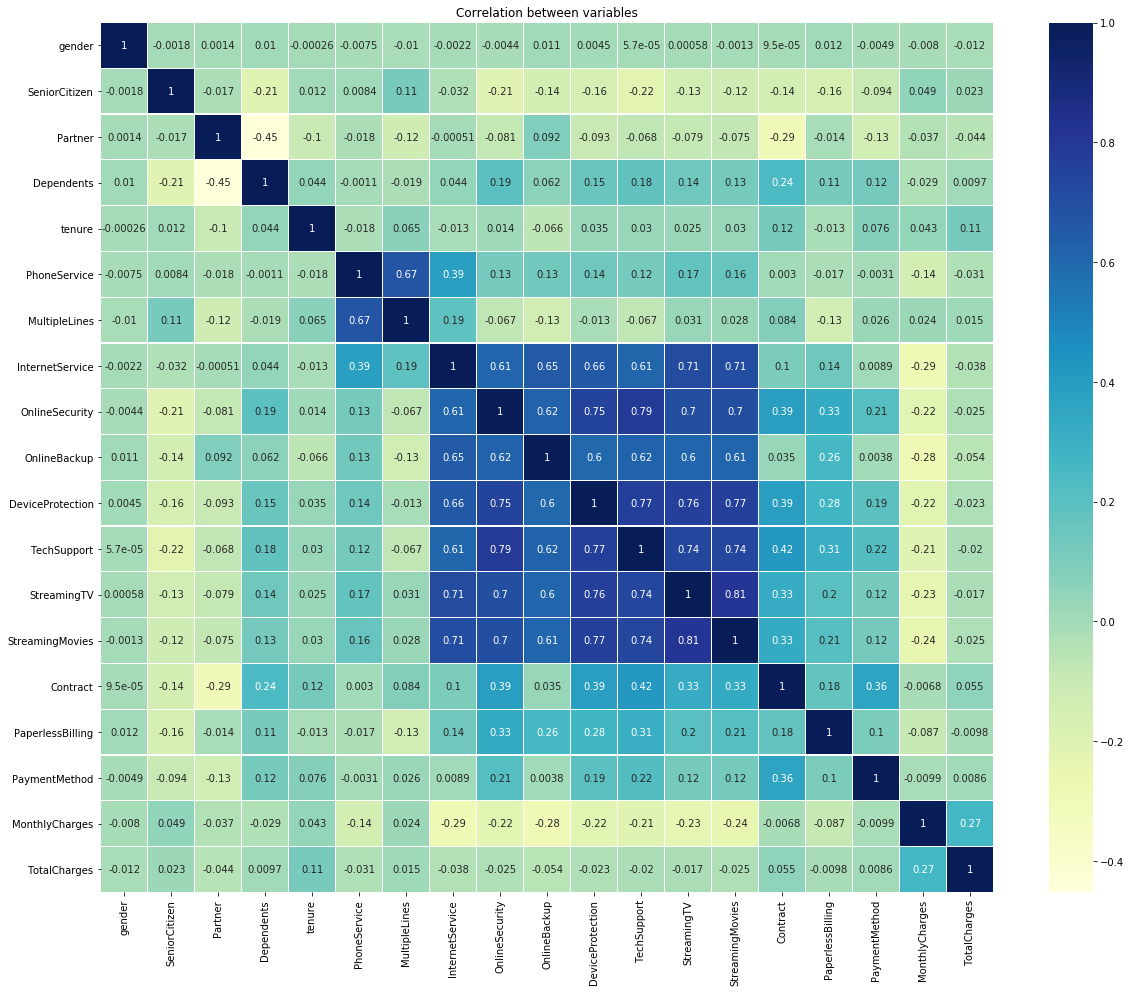

In [18]:
# 使用热地图显示相关系数
'''
heatmap    使用热地图展示系数矩阵情况
linewidths 热力图矩阵之间的间隔大小
annot      设定是否显示每个色块的系数值
'''
plt.figure(figsize=(20,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")
plt.show()

#### 结论：从上图可以看出，互联网服务、网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视和网络电影之间存在较强的相关性，多线业务和电话服务之间也有很强的相关性，并且都呈强正相关关系。

## 3.5、独热编码

In [19]:
tel_dummies = pd.get_dummies(telcom.iloc[:,1:21])
tel_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## 3.6、电信用户是否流失与各变量之间的相关性

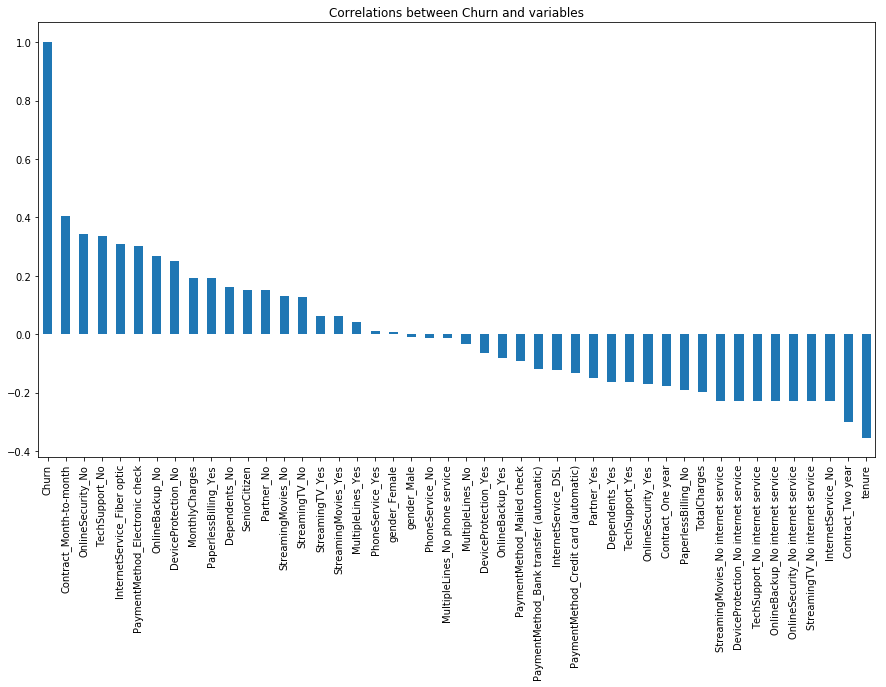

In [20]:
plt.figure(figsize=(15,8))
tel_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title("Correlations between Churn and variables")
plt.show()

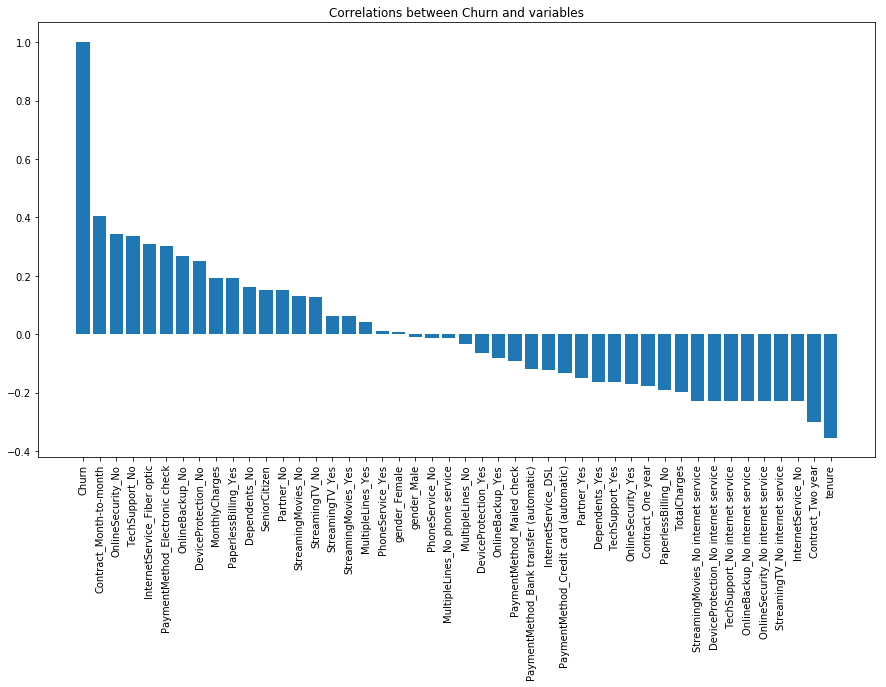

In [21]:
# 另一种表示的方法
plt.figure(figsize=(15,8))
df=tel_dummies.corr()['Churn'].sort_values(ascending = False)
plt.bar(df.index,df.values)
plt.title("Correlations between Churn and variables")
plt.xticks(rotation=90)
plt.show()

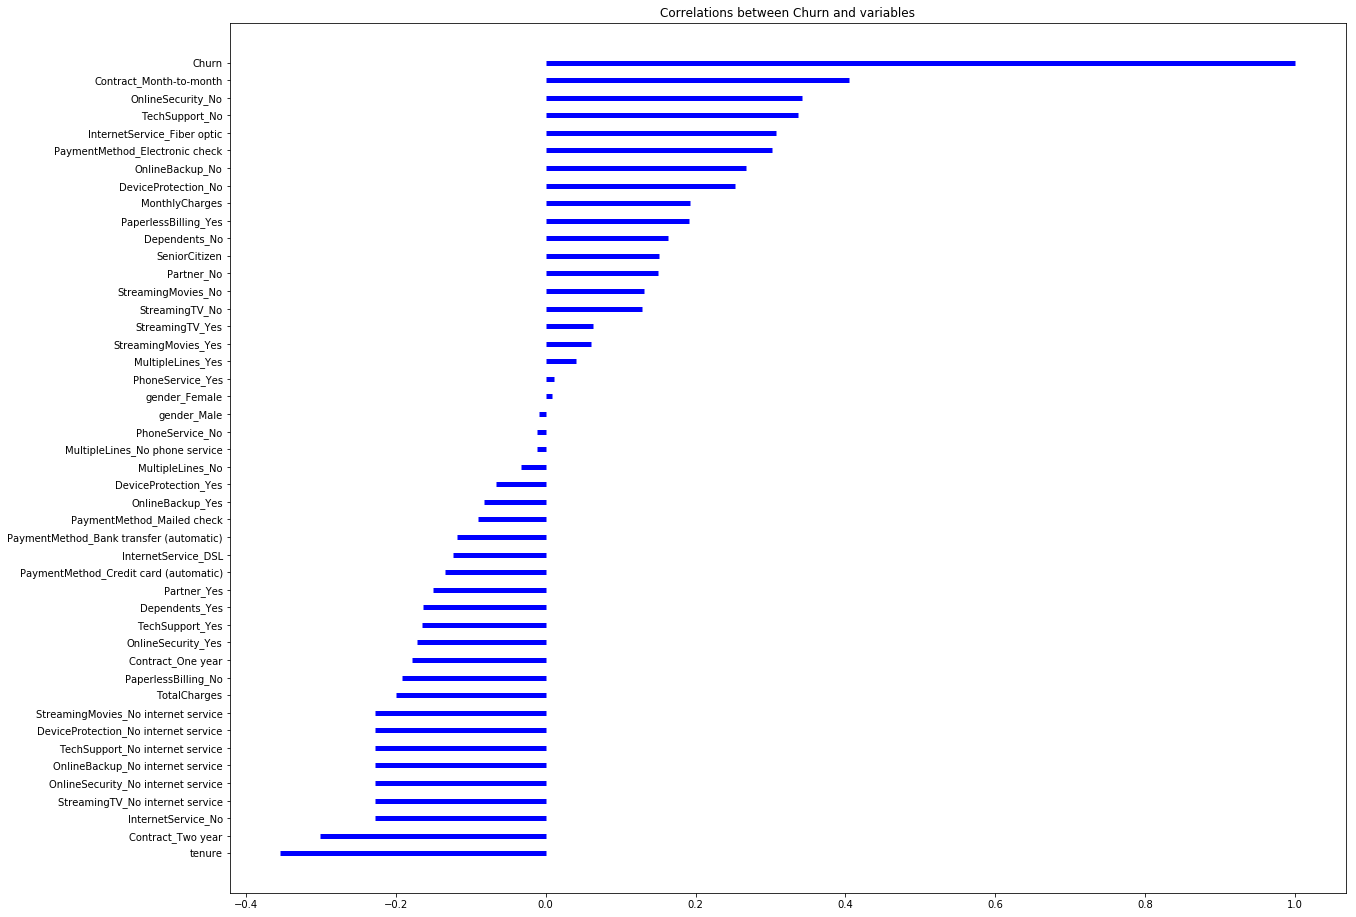

In [22]:
# 另一种表现手法
plt.figure(figsize=(20,16))
df=tel_dummies.corr()['Churn'].sort_values()
plt.hlines(y=df.index,xmin=0,xmax=df.values,linewidth=5,color='blue')
plt.title("Correlations between Churn and variables")
plt.show()

#### 由图上可以看出，变量gender 和 PhoneService 处于图形中间，其值接近于 0 ，这两个变量对电信客户流失预测影响非常小，可以直接舍弃。


## 3.7、网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视、网络电影和无互联网服务对客户流失率的影响

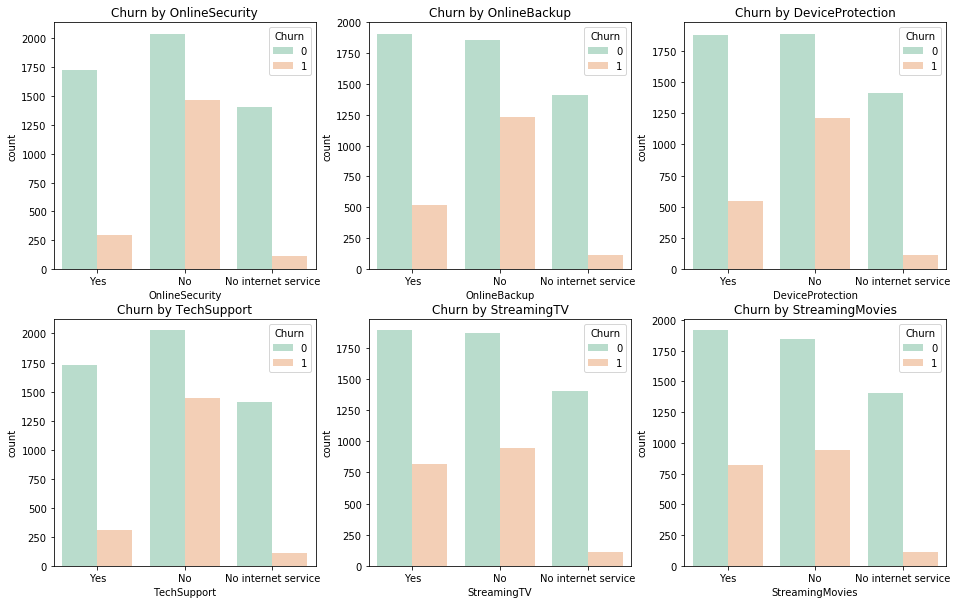

In [23]:
covariables=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(16,10))
for i, item in enumerate(covariables):
    plt.subplot(2,3,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=telcom,palette="Pastel2",order=["Yes","No","No internet service"])
    plt.xlabel(str(item))
    plt.title("Churn by "+ str(item))
    i=i+1
plt.show()

#### 由上图可以看出，在网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视和网络电影六个变量中，没有互联网服务的客户流失率值是相同的，都是相对较低。这可能是因为以上六个因素只有在客户使用互联网服务时才会影响客户的决策，这六个因素不会对不使用互联网服务的客户决定是否流失产生推论效应。


## 3.8、签订合同方式对客户流失率的影响

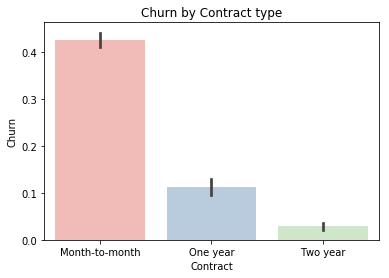

In [24]:
sns.barplot(x="Contract",y="Churn", data=telcom, palette="Pastel1", order= ['Month-to-month', 'One year', 'Two year'])
plt.title("Churn by Contract type")
plt.show()

#### 由图上可以看出，签订合同方式对客户流失率影响为：按月签订 > 按一年签订 > 按两年签订，这可能表明，设定长期合同对留住现有客户更有效。


## 3.9、付款方式对客户流失率的影响

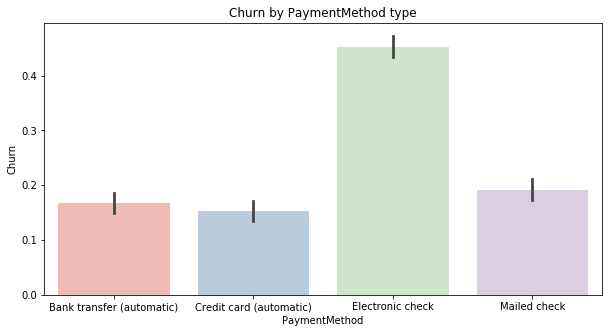

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x="PaymentMethod",y="Churn", data=telcom, palette="Pastel1", order= ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check','Mailed check'])
plt.title("Churn by PaymentMethod type")
plt.show()

#### 由图上可以看出，在四种支付方式中，使用Electronic check的用户流流失率最高，其他三种支付方式基本持平，因此可以推断电子账单在设计上影响用户体验。


# -----------------------------------------------------------------------
# 数据预处理
#### 由前面结果可知，CustomerID表示每个客户的随机字符，对后续建模不影响，我这里选择删除CustomerID列；gender 和 PhoneService 与流失率的相关性低，可直接忽略。

In [26]:
telcomvar=telcom.iloc[:,2:20]
telcomvar.drop("PhoneService",axis=1, inplace=True)
# 提取ID
telcom_id = telcom['customerID']
telcomvar.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


## 4.2 对客户的职位、月费用和总费用进行去均值和方差缩放，对数据进行标准化

In [27]:

"""
标准化数据，保证每个维度的特征数据方差为1，均值为0，使得预测结果不会被某些维度过大的特征值而主导。
就是（旧值-均值）/ 标准差
"""
scaler = StandardScaler(copy=False)
# fit_transform()的作用就是先拟合数据，然后转化它将其转化为标准形式
scaler.fit_transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [28]:
# tranform()的作用是通过找中心和缩放等实现标准化
telcomvar[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])

#### 关于fit_transform()和transform()的区别 https://blog.csdn.net/qq_30638831/article/details/80200684

## 4.3、 使用箱线图查看数据是否存在异常值

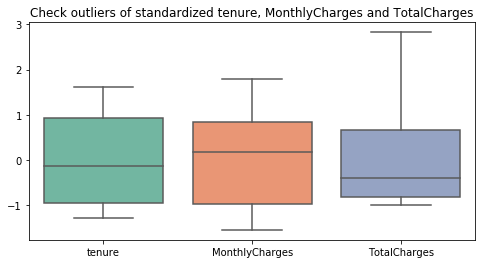

In [29]:
plt.figure(figsize = (8,4))
numbox = sns.boxplot(data=telcomvar[['tenure','MonthlyCharges','TotalCharges']], palette="Set2")
plt.title("Check outliers of standardized tenure, MonthlyCharges and TotalCharges")
plt.show()

#### 由以上结果可以看出，在三个变量中不存在明显的异常值

## 4.4、查看对象类型字段中存在的值

In [30]:
def uni(columnlabel):
    print(columnlabel,"--" ,telcomvar[columnlabel].unique())  # unique函数去除其中重复的元素，返回唯一值

telcomobject=telcomvar.select_dtypes(['object'])
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No phone service' 'No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes' 'No internet service']
OnlineBackup -- ['Yes' 'No' 'No internet service']
DeviceProtection -- ['No' 'Yes' 'No internet service']
TechSupport -- ['No' 'Yes' 'No internet service']
StreamingTV -- ['No' 'Yes' 'No internet service']
StreamingMovies -- ['No' 'Yes' 'No internet service']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


#### 综合之前的结果来看，在六个变量中存在No internet service，即无互联网服务对客户流失率影响很小，这些客户不使用任何互联网产品，因此可以将No internet service 和 No 是一样的效果，可以使用 No 替代 No internet service。

In [31]:
telcomvar.replace(to_replace='No internet service', value='No', inplace=True)
telcomvar.replace(to_replace='No phone service', value='No', inplace=True)
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes']
OnlineBackup -- ['Yes' 'No']
DeviceProtection -- ['No' 'Yes']
TechSupport -- ['No' 'Yes']
StreamingTV -- ['No' 'Yes']
StreamingMovies -- ['No' 'Yes']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## 4.5、使用Scikit-learn标签编码,将分类数据转换为整数编码

In [32]:
def labelencode(columnlabel):
    telcomvar[columnlabel] = LabelEncoder().fit_transform(telcomvar[columnlabel])

for i in range(0,len(telcomobject.columns)):
    labelencode(telcomobject.columns[i])

for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- [1 0]
Dependents -- [0 1]
MultipleLines -- [0 1]
InternetService -- [0 1 2]
OnlineSecurity -- [0 1]
OnlineBackup -- [1 0]
DeviceProtection -- [0 1]
TechSupport -- [0 1]
StreamingTV -- [0 1]
StreamingMovies -- [0 1]
Contract -- [0 1 2]
PaperlessBilling -- [1 0]
PaymentMethod -- [2 3 0 1]


# 构造模型
## 5.1、建立训练数据集和测试数据集

In [33]:
"""
我们需要将数据集拆分为训练集和测试集以进行验证。
由于我们所拥有的数据集是不平衡的，所以最好使用分层交叉验证来确保训练集和测试集都包含每个类样本的保留人数。
交叉验证函数StratifiedShuffleSplit，功能是从样本数据中随机按比例选取训练数据（train）和测试数据（test）
参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10
参数test_size和train_size是用来设置train/test对中train和test所占的比例
参数 random_state控制是将样本随机打乱
"""
X=telcomvar
y=telcom["Churn"].values
sss=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print(sss)
print("训练数据和测试数据被分成的组数：",sss.get_n_splits(X,y))

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)
训练数据和测试数据被分成的组数： 5


In [34]:
# 建立训练数据和测试数据
for train_index, test_index in sss.split(X, y):
    print("train:", train_index, "test:", test_index)
    X_train,X_test=X.iloc[train_index], X.iloc[test_index]
    y_train,y_test=y[train_index], y[test_index]

train: [3780 1588 2927 ... 3956 6130 6814] test: [5126 2423 2498 ... 6703 6618 6010]
train: [6916 6953 5388 ... 6156 3262 3471] test: [4097 4734 2309 ... 1278 1724 5508]
train: [1218 2877 3756 ...  848 4568 6967] test: [ 133 1822 5303 ... 3150 5611 4569]
train: [2552 4723 2055 ... 4030 2165 1994] test: [ 233  438 4434 ... 4625 1121 3422]
train: [4040 1561 6463 ... 2550 6727 4009] test: [4581 3898 3153 ... 2095 1765 2249]


In [35]:
# 输出数据集大小
print('原始数据特征：', X.shape,
      '训练数据特征：',X_train.shape,
      '测试数据特征：',X_test.shape)

print('原始数据标签：', y.shape,
      '   训练数据标签：',y_train.shape,
      '   测试数据标签：',y_test.shape)


原始数据特征： (7032, 17) 训练数据特征： (5625, 17) 测试数据特征： (1407, 17)
原始数据标签： (7032,)    训练数据标签： (5625,)    测试数据标签： (1407,)


## 5.2、选择机器学习算法

In [51]:
# 使用分类算法，这里选用10种分类算法
Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
             ["GradientBoostingClassifier", GradientBoostingClassifier()],
             ["XGB", XGBClassifier()],
             ["CatBoost", CatBoostClassifier(logging_level='Silent')],
             ['LGB',LGBMClassifier()]
]

## 5.3、训练模型

In [52]:
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier=classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    class_eva=pd.DataFrame([recall,precision,f1])
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)


## 5.4、评估模型

In [53]:
"""
召回率（recall）的含义是：原本为对的当中，预测为对的比例（值越大越好，1为理想状态）
精确率、精度（precision）的含义是：预测为对的当中，原本为对的比例（值越大越好，1为理想状态）
F1分数（F1-Score）指标综合了Precision与Recall的产出的结果
F1-Score的取值范围从0到1的，1代表模型的输出最好，0代表模型的输出结果最差。
"""

names=pd.DataFrame(names)
names=names[0].tolist()
result=pd.concat(Classify_result,axis=1)
result.columns=names
result.index=["recall","precision","f1score"]
result

,Random Forest,Support Vector Machine,LogisticRegression,KNN,Naive Bayes,Decision Tree,AdaBoostClassifier,GradientBoostingClassifier,XGB,CatBoost,LGB
recall,0.438503,0.459893,0.548128,0.478610,0.740642,0.513369,0.548128,0.545455,0.542781,0.532086,0.526738
precision,0.618868,0.696356,0.652866,0.561129,0.552894,0.497409,0.672131,0.673267,0.678930,0.650327,0.654485
f1score,0.513302,0.553945,0.595930,0.516595,0.633143,0.505263,0.603829,0.602659,0.603269,0.585294,0.583704


#### 综上所述，在10种分类算法中朴素贝叶斯（Naive Bayes）的F1分数最大为63.31%，所以使用朴素贝叶斯模型效果最好。

# 实施方案
#### 预测数据集特征（由于没有提供预测数据集，这里选取后10行作为需要预测的数据集）

In [56]:

# 预测数据集特征（由于没有提供预测数据集，这里选取后10行作为需要预测的数据集）
pred_X = telcomvar.tail(10)
y_true=telcom["Churn"].tail(10)

# 提取customerID
pre_id = telcom_id.tail(10)

# 使用朴素贝叶斯方法，对预测数据集中的生存情况进行预测
model = GaussianNB()
model.fit(X_train,y_train)
pred_y = model.predict(pred_X)

# 预测结果
predDf = pd.DataFrame({'customerID':pre_id, 'Churn':pred_y,'True':y_true})
predDf

,Churn,True,customerID
7033,1,0,9767-FFLEM
7034,0,1,0639-TSIQW
7035,1,0,8456-QDAVC
7036,0,0,7750-EYXWZ
7037,0,0,2569-WGERO
7038,0,0,6840-RESVB
7039,0,0,2234-XADUH
7040,0,0,4801-JZAZL
7041,1,1,8361-LTMKD
7042,0,0,3186-AJIEK
